Setting up a basic feed forward neural network that can taking images from the MNIST dataset and identifying them accurately

Importing necessary libraries

In [9]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import time
import torch.optim as optim
import matplotlib.pyplot as plt

Downloading and storing the data adequately


In [10]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=1000, shuffle=False)

Implementing and making the model

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
# print(net)



loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


for epoch in range(7): # 7 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.

        X,y=X.to(device),y.to(device)
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients




Determining the accuracy of model by testing testset

In [19]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        X,y=X.to(device),y.to(device)
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 5)*100,"%")
print(f"Loss is: {loss.item()}")

Accuracy:  97.11999999999999 %
Loss is: 0.005406938027590513


Checking for a datapoint

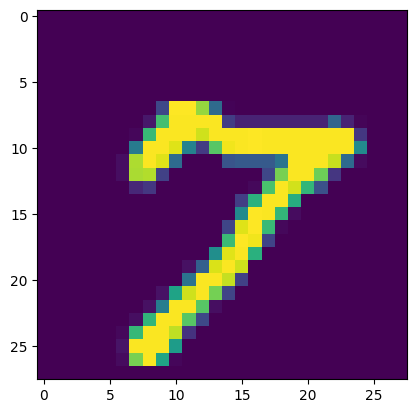

The given image shows 7


In [20]:
plt.imshow(data[0][0].view(28,28))
plt.show()
print(f"The given image shows {torch.argmax(net(X[0].view(-1,784))[0]).item()}")